# Load Data

In [16]:
import pandas as pd

# Paths to the data files
training_data_path = 'Data/twitter_training.csv'
validation_data_path = 'Data/twitter_validation.csv' 

# Loading the training data
training_data = pd.read_csv(training_data_path, header=None)
training_data.columns = ["id", "platform", "sentiment", "text"]

# Loading the validation data
validation_data = pd.read_csv(validation_data_path, header=None)
validation_data.columns = ["id", "platform", "sentiment", "text"]

# Displaying the first few rows of the training data
print("First few rows of the training data:")
print(training_data.head())

# Similarly, you can display the first few rows of the validation data
print("\nFirst few rows of the validation data:")
print(validation_data.head())


First few rows of the training data:
     id     platform sentiment   
0  2401  Borderlands  Positive  \
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                text  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  

First few rows of the validation data:
     id   platform   sentiment   
0  3364   Facebook  Irrelevant  \
1   352     Amazon     Neutral   
2  8312  Microsoft    Negative   
3  4371      CS-GO    Negative   
4  4433     Google     Neutral   

                                                text  
0  I mentioned on Facebook that I was struggling ...  
1  BBC News - Amazon boss Jeff Bezos rejects clai...  
2  @Microsoft Why 

# EDA

In [17]:

# Number of tweets in the training data
print("Number of tweets in the training data: ", len(training_data))

# Number of tweets in the validation data
print("Number of tweets in the validation data: ", len(validation_data))

# Number of tweets per sentiment in the training data
print("Number of tweets per sentiment in the training data:")
print(training_data.sentiment.value_counts())

# Number of tweets per sentiment in the validation data
print("\nNumber of tweets per sentiment in the validation data:")
print(validation_data.sentiment.value_counts())

# Missing values
print("Number of missing values per column in the training data:")
print(training_data.isnull().sum())

print("\nNumber of missing values per column in the validation data:")
print(validation_data.isnull().sum())

# Dropping rows with missing values
training_data = training_data.dropna()
validation_data = validation_data.dropna()

# Number of tweets after dropping missing values
print("Number of tweets in the training data after dropping missing values: ", len(training_data))
print("Number of tweets in the validation data after dropping missing values: ", len(validation_data))





Number of tweets in the training data:  74682
Number of tweets in the validation data:  1000
Number of tweets per sentiment in the training data:
sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

Number of tweets per sentiment in the validation data:
sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64
Number of missing values per column in the training data:
id             0
platform       0
sentiment      0
text         686
dtype: int64

Number of missing values per column in the validation data:
id           0
platform     0
sentiment    0
text         0
dtype: int64
Number of tweets in the training data after dropping missing values:  73996
Number of tweets in the validation data after dropping missing values:  1000


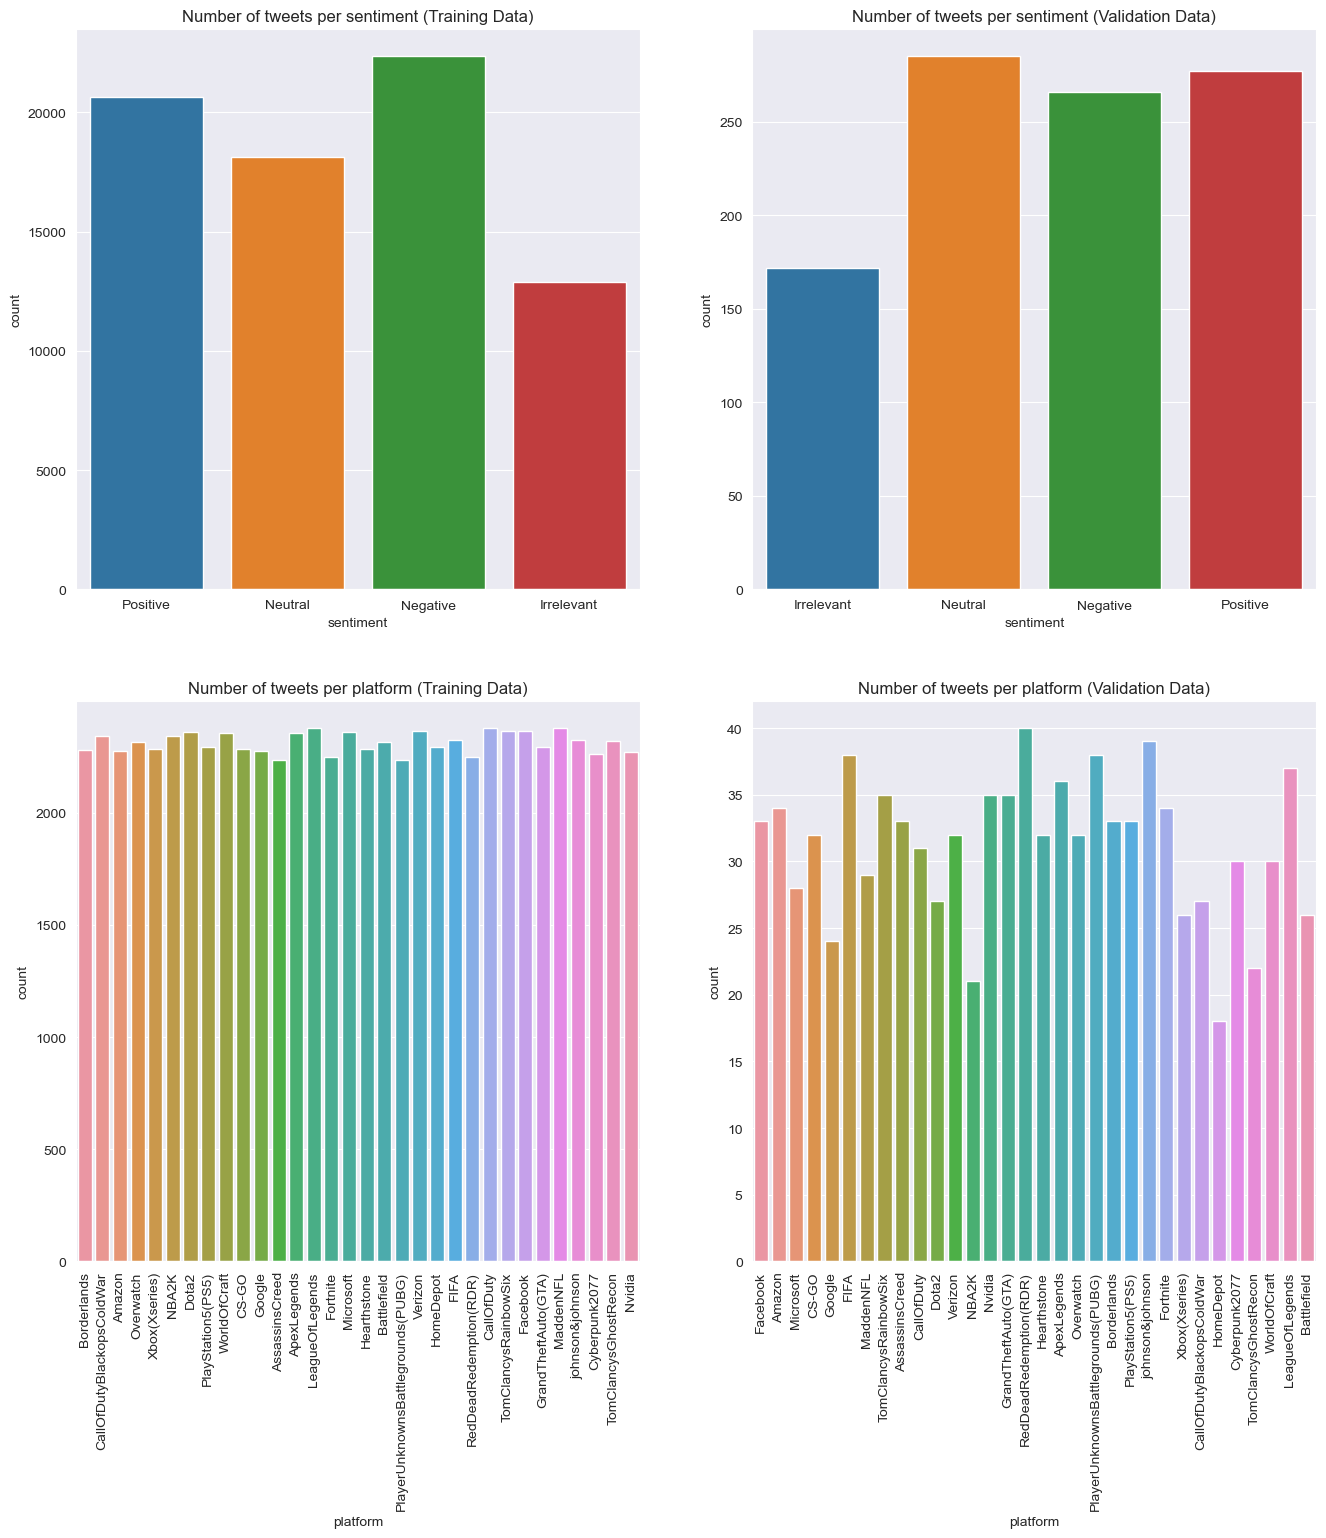

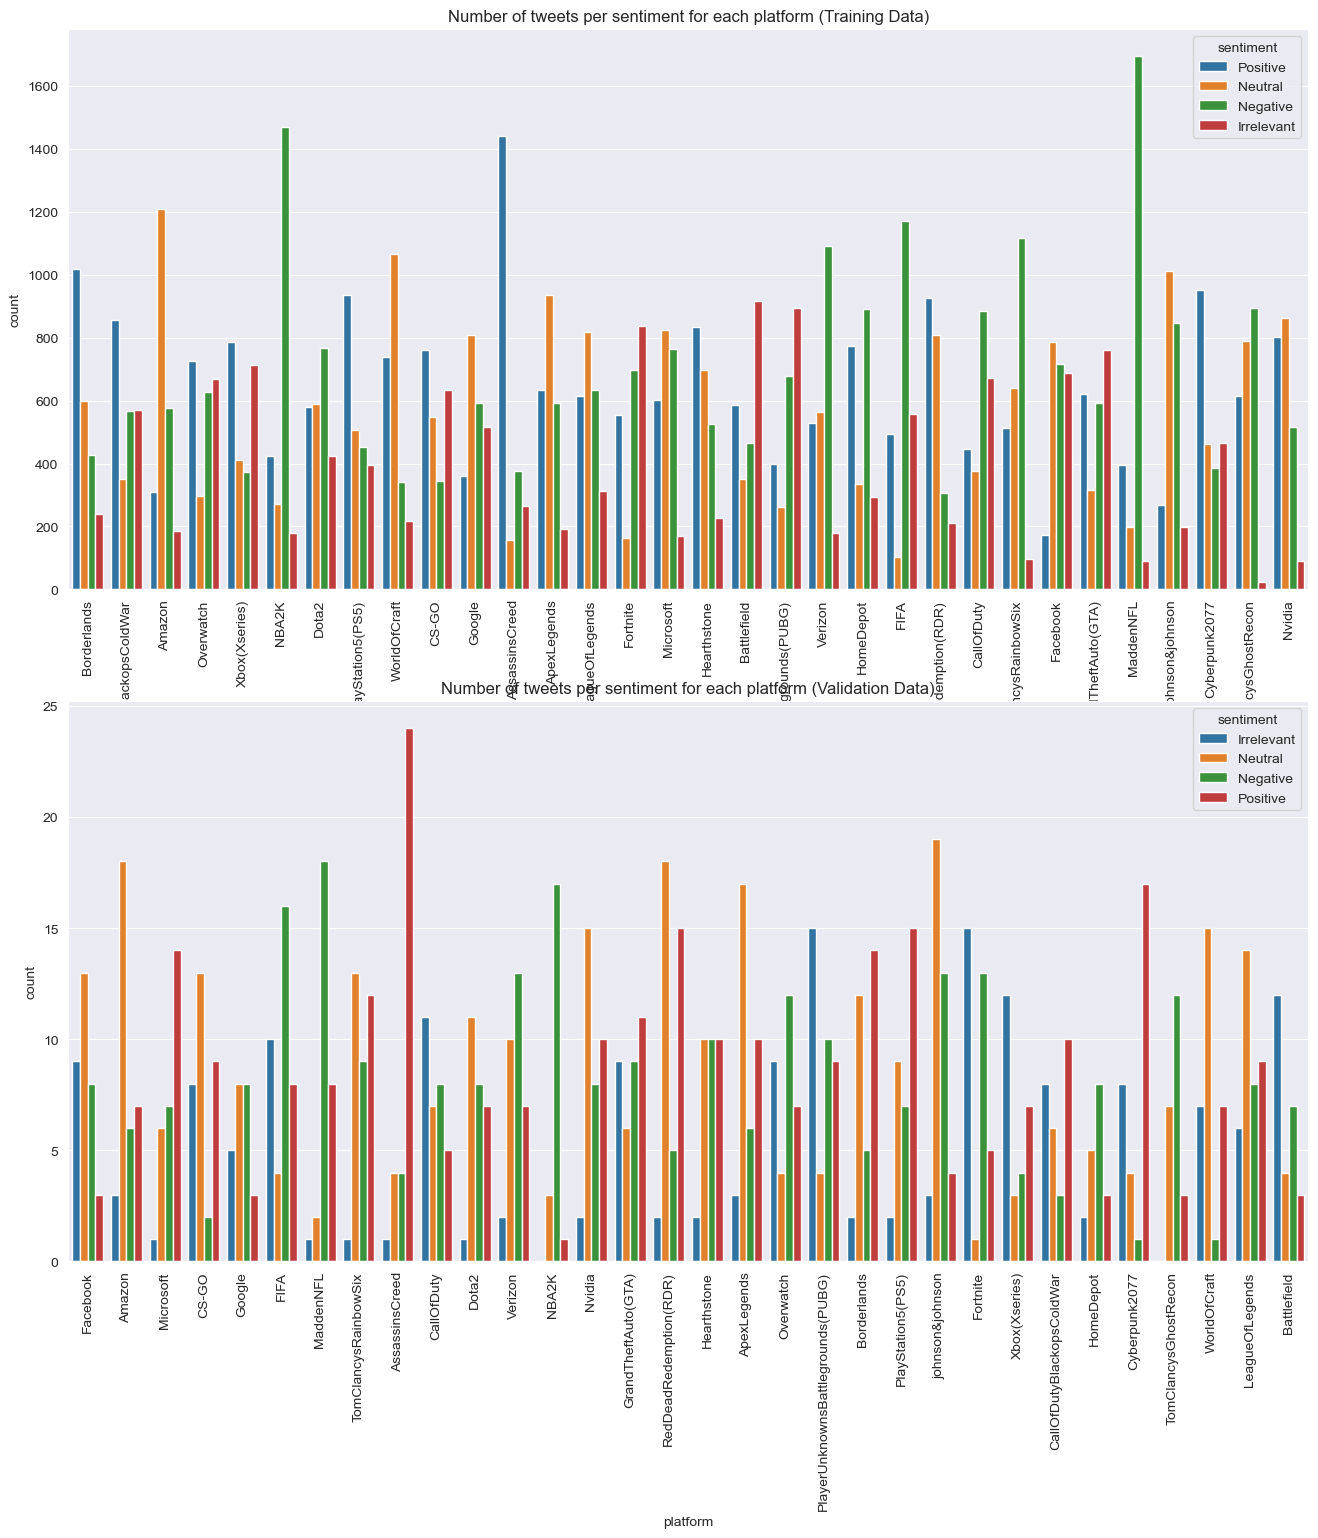

In [18]:
# Some graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for all the plots
sns.set_style("darkgrid")

# Creating a grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

# Plotting the number of tweets per sentiment for the training data
sns.countplot(x="sentiment", data=training_data, ax=axs[0, 0])
axs[0, 0].set_title("Number of tweets per sentiment (Training Data)")

# Plotting the number of tweets per sentiment for the validation data
sns.countplot(x="sentiment", data=validation_data, ax=axs[0, 1])
axs[0, 1].set_title("Number of tweets per sentiment (Validation Data)")

# Plotting the number of tweets per platform for the training data
sns.countplot(x="platform", data=training_data, ax=axs[1, 0])
axs[1, 0].set_title("Number of tweets per platform (Training Data)")
axs[1, 0].tick_params(axis='x', rotation=90)

# Plotting the number of tweets per platform for the validation data
sns.countplot(x="platform", data=validation_data, ax=axs[1, 1])
axs[1, 1].set_title("Number of tweets per platform (Validation Data)")
axs[1, 1].tick_params(axis='x', rotation=90)

# Displaying the plots
plt.show()

# Creating a grid of plots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(16, 16))

# Plotting the number of tweets per sentiment for each platform
sns.countplot(x="platform", hue="sentiment", data=training_data, ax=axs[0])
axs[0].set_title("Number of tweets per sentiment for each platform (Training Data)")
axs[0].tick_params(axis='x', rotation=90)

# Plotting the number of tweets per sentiment for each platform
sns.countplot(x="platform", hue="sentiment", data=validation_data, ax=axs[1])
axs[1].set_title("Number of tweets per sentiment for each platform (Validation Data)")
axs[1].tick_params(axis='x', rotation=90)

# Displaying the plots
plt.show()

# Preprocessing the Data

In [19]:
# Data Preprocessing
import re
import torch
from transformers import AutoTokenizer

# Function to clean the tweets
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()                  # Convert to lowercase
    return text

# Apply the cleaning function to the tweets
training_data['text'] = training_data['text'].apply(clean_text)
validation_data['text'] = validation_data['text'].apply(clean_text)

# Print some processed tweets to verify
print("Processed Training Tweets:")
print(training_data['text'].head())

print("\nProcessed Validation Tweets:")
print(validation_data['text'].head())

# Choose a pre-trained model and tokenizer
model_name = 'bert-base-uncased'  # You can change this to any other model
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenizing the tweets
def tokenize_tweets(data, tokenizer):
    return tokenizer(data['text'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='pt')

# Tokenizing training and validation data
train_encodings = tokenize_tweets(training_data, tokenizer)
val_encodings = tokenize_tweets(validation_data, tokenizer)

# Converting sentiments to numeric
sentiment_mapping = {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}

training_data['sentiment'] = training_data['sentiment'].map(sentiment_mapping)
validation_data['sentiment'] = validation_data['sentiment'].map(sentiment_mapping)

# Convert sentiments to tensors
train_labels = torch.tensor(training_data['sentiment'].values)
val_labels = torch.tensor(validation_data['sentiment'].values)

# Print some processed data to verify
print("\nProcessed Training Labels:")
print(train_labels[:5])
print(train_encodings['input_ids'][:2])

print("\nProcessed Validation Labels:")
print(val_labels[:5])
print(val_encodings['input_ids'][:2])



Processed Training Tweets:
0    im getting on borderlands and i will murder yo...
1    i am coming to the borders and i will kill you...
2    im getting on borderlands and i will kill you all
3    im coming on borderlands and i will murder you...
4    im getting on borderlands 2 and i will murder ...
Name: text, dtype: object

Processed Validation Tweets:
0    i mentioned on facebook that i was struggling ...
1    bbc news  amazon boss jeff bezos rejects claim...
2     why do i pay for word when it functions so po...
3    csgo matchmaking is so full of closet hacking ...
4    now the president is slapping americans in the...
Name: text, dtype: object

Processed Training Labels:
tensor([1, 1, 1, 1, 1])
tensor([[  101, 10047,  2893,  2006,  3675,  8653,  1998,  1045,  2097,  4028,
          2017,  2035,   102,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,  

# Preparing the Dataset and DataLoader

In [20]:
from torch.utils.data import Dataset, DataLoader

# Creating a custom dataset for our tweets
class TwitterDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item
    
# Creating the dataset and dataloader for the neural network
train_dataset = TwitterDataset(train_encodings, train_labels)
val_dataset = TwitterDataset(val_encodings, val_labels)

# make datasets smaller for debugging and experimentation
train_dataset = TwitterDataset(train_encodings, train_labels) # TODO: remove [:1000] to use the full dataset
val_dataset = TwitterDataset(val_encodings, val_labels) # TODO: remove [:500] to use the full dataset

batch_size = 16  # Adjust this based on your GPU memory and model size

# Create the dataloaders for the training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# load a batch and print its contents
data = next(iter(train_loader))
print("Batch keys:", data.keys())
print("Batch input shape:", data['input_ids'].shape)
print("Batch attention shape:", data['attention_mask'].shape)
print("Batch label shape:", data['labels'].shape)

# print("\nBatch input:", data['input_ids'][0])
# print("\nBatch token type:", data['token_type_ids'][0])
# print("\nBatch attention:", data['attention_mask'][0])
# print("\nBatch label:", data['labels'][0])





Batch keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'labels'])
Batch input shape: torch.Size([16, 128])
Batch attention shape: torch.Size([16, 128])
Batch label shape: torch.Size([16])


#  Loading the BertForSequenceClassification Model

In [21]:
from transformers import BertForSequenceClassification
from torch.utils.data import DataLoader
import torch
from torch.optim import AdamW
from tqdm import tqdm

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Load the pre-trained BERT model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=4)
model.to(device)

# Define Loss Function and Optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=5e-5)

Device: cuda


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

# Load trained bert-model if available

In [22]:
import os
import pickle

train_loss_history = []
train_acc_history = []
val_loss_history = []
val_acc_history = []

# if available and desired, load the saved model parameters and loss/accuracy history
load_saved_model = True # change as desired

if os.path.exists('Models/twitter_sentiment_analysis.pt') and os.path.exists('Models/twitter_sentiment_analysis_loss_acc_history.pkl') and load_saved_model: # check if the model and history exist
    with open('Models/twitter_sentiment_analysis_loss_acc_history.pkl', 'rb') as f: # load the history
        train_loss_history, train_acc_history, val_loss_history, val_acc_history = pickle.load(f)
    print("Loaded saved loss and accuracy history")

    model.load_state_dict(torch.load('Models/twitter_sentiment_analysis.pt')) # load the model
    print("Loaded trained model")
else:
    print("Did not load trained model and history, either because they don't exist or because load_saved_model is False")

Loaded saved loss and accuracy history
Loaded trained model


# Train loop, Val loop and train_val loop for BertForSequenceClassification

In [23]:
# Training Loop
def train_model(train_loader, model, optimizer, loss_function):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.logits, 1)
        total_samples += labels.size(0)
        total_correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    avg_acc = total_correct / total_samples
    train_loss_history.append(avg_loss)
    train_acc_history.append(avg_acc)
    print(f"Train Loss: {avg_loss:.4f}, Train Acc: {avg_acc:.4f}")


# Validation Loop
def validate_model(val_loader, model, loss_function):
    model.eval()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            total_loss += loss.item()

            _, predicted = torch.max(outputs.logits, 1)
            total_samples += labels.size(0)
            total_correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(val_loader)
    avg_acc = total_correct / total_samples
    val_loss_history.append(avg_loss)
    val_acc_history.append(avg_acc)
    print(f"Val Loss: {avg_loss:.4f}, Val Acc: {avg_acc:.4f}")

# Training and Validation Loop
def train_and_val(train_loader, val_loader, model, optimizer, loss_function, epochs=3):
    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}")
        train_model(train_loader, model, optimizer, loss_function)
        validate_model(val_loader, model, loss_function)

In [24]:
# Train and validate the model
train_and_val(train_loader, val_loader, model, optimizer, loss_function, epochs=0)



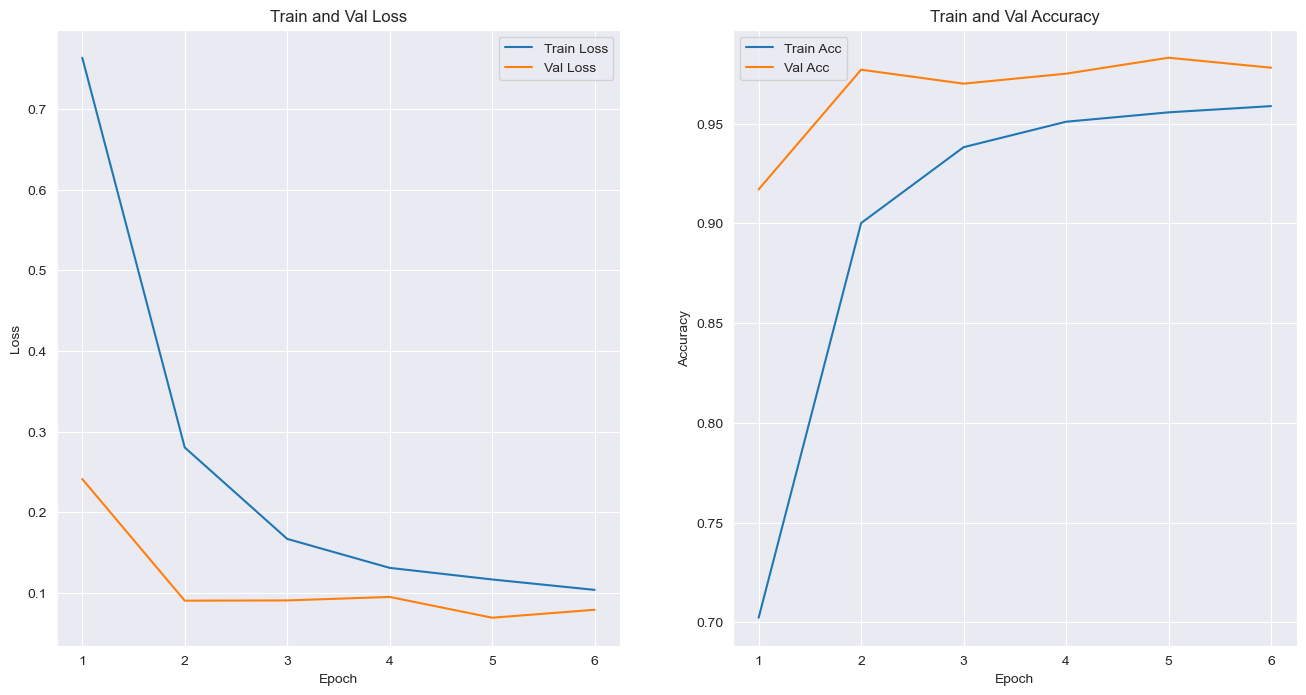

In [25]:
import numpy as np
# Plot the training and validation loss and accuracy
epochs = np.arange(1, len(train_loss_history) + 1)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss_history, label='Train Loss')
plt.plot(epochs, val_loss_history, label='Val Loss')
plt.title('Train and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_history, label='Train Acc')
plt.plot(epochs, val_acc_history, label='Val Acc')
plt.title('Train and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Save the trained BertForSequenceClassification

In [26]:
# Save the model
model_save_path = "Models/twitter_sentiment_analysis.pt"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# save the training and validation loss and accuracy
import pickle
with open('Models/twitter_sentiment_analysis_loss_acc_history.pkl', 'wb') as f:
    pickle.dump((train_loss_history, train_acc_history, val_loss_history, val_acc_history), f)
print("Saved loss and accuracy history")

Model saved to Models/twitter_sentiment_analysis.pt
Saved loss and accuracy history


# my own tweet test for BertForSequenceClassification

In [42]:
print("sentiment_mapping:", sentiment_mapping) # print the mapping between numeric labels and sentiments

# test the model on my own text
text_pos = "i had an great time" # change this text as desired
text_neg = "i hate you" # change this text as desired
text_neutral = "the game ended in a bang" # change this text as desired
text_irrelevant = "https://www.google.com" # change this text as desired

# positive sentiment test
encoding_pos = tokenizer(text_pos, return_tensors='pt').to(device) # tokenize the text
output_pos = model(**encoding_pos) # run the text through the model
prediction_pos = torch.argmax(output_pos.logits, dim=1).item() # get the predicted label
prediction_pos = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(prediction_pos)] # convert the predicted label to sentiment
print("Pos_text: {}, Prediction: {}".format(text_pos, prediction_pos))

# negative sentiment test
encoding_neg = tokenizer(text_neg, return_tensors='pt').to(device) # tokenize the text
output_neg = model(**encoding_neg) # run the text through the model
prediction_neg = torch.argmax(output_neg.logits, dim=1).item() # get the predicted label
prediction_neg = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(prediction_neg)] # convert the predicted label to sentiment
print("Neg_text: {}, Prediction: {}".format(text_neg, prediction_neg))

# neutral sentiment test
encoding_neutral = tokenizer(text_neutral, return_tensors='pt').to(device) # tokenize the text
output_neutral = model(**encoding_neutral) # run the text through the model
prediction_neutral = torch.argmax(output_neutral.logits, dim=1).item() # get the predicted label
prediction_neutral = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(prediction_neutral)] # convert the predicted label to sentiment
print("Neutral_text: {}, Prediction: {}".format(text_neutral, prediction_neutral))

# irrelevant sentiment test
encoding_irrelevant = tokenizer(text_irrelevant, return_tensors='pt').to(device) # tokenize the text
output_irrelevant = model(**encoding_irrelevant) # run the text through the model
prediction_irrelevant = torch.argmax(output_irrelevant.logits, dim=1).item() # get the predicted label
prediction_irrelevant = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(prediction_irrelevant)] # convert the predicted label to sentiment
print("Irrelevant_text: {}, Prediction: {}".format(text_irrelevant, prediction_irrelevant))




sentiment_mapping: {'Negative': 0, 'Positive': 1, 'Neutral': 2, 'Irrelevant': 3}
Pos_text: i had an great time, Prediction: Positive
Neg_text: i hate you, Prediction: Negative
Neutral_text: the game ended in a bang, Prediction: Irrelevant
Irrelevant_text: https://www.google.com, Prediction: Neutral
